# Notebook para a analise exploratória e tratamento dos dados para o TCC

# Bibliotecas e instalações 

In [350]:
import pandas as pd
import numpy as np

# Gráficas
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

In [351]:
# Pré-Processamento
from sklearn.preprocessing import LabelEncoder, StandardScaler, MinMaxScaler, MaxAbsScaler, PowerTransformer, QuantileTransformer
from sklearn.model_selection import train_test_split

In [352]:
# Classificação
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn import tree

# Leitura dos dados

In [354]:
dados_cancer= pd.read_csv('prostata_csv.csv', sep = ',', encoding = 'UTF-8',low_memory=False)

In [355]:
dados_cancer.head()

,ESCOLARI,IDADE,SEXO,UFNASC,UFRESID,IBGE,CIDADE,CATEATEND,DTCONSULT,CLINICA,...,REC03,REC04,IBGEATEN,CIDO,DSCCIDO,HABILIT,HABIT11,HABILIT1,HABILIT2,CIDADEH
0,9,72,1,TO,SP,3524402,JACAREI,2,10/4/2016,32,...,NaN,NaN,3524402,80001,NEOPLASIA DE COMPORTAMENTO INCERTO SE BENIGNO ...,1,UNACON,1,1,Jacarei
1,5,67,1,SP,SP,3533007,NOVA GRANADA,2,10/13/2019,32,...,NaN,NaN,3549805,80001,NEOPLASIA DE COMPORTAMENTO INCERTO SE BENIGNO ...,10,"UNACON com Serviþos de Radioterapia, de Hemato...",1,1,SÒo JosÚ do Rio Preto
2,2,97,1,SP,SP,3555406,UBATUBA,2,2/13/2009,24,...,NaN,NaN,3524402,80003,NEOPLASIA MALIGNA,1,UNACON,1,1,Jacarei
3,2,74,1,SP,SP,3524402,JACAREI,2,12/20/2013,24,...,NaN,NaN,3524402,80003,NEOPLASIA MALIGNA,1,UNACON,1,1,Jacarei
4,9,58,1,SP,SP,3524402,JACAREI,2,5/21/2014,24,...,NaN,NaN,3524402,80003,NEOPLASIA MALIGNA,1,UNACON,1,1,Jacarei


In [356]:
dados_cancer.shape

(103198, 100)

# Análise dos Dados

In [358]:
#Copia do DataFrame original
data = dados_cancer.copy()

In [359]:
data.dtypes

ESCOLARI     int64
IDADE        int64
SEXO         int64
UFNASC      object
UFRESID     object
             ...  
HABILIT      int64
HABIT11     object
HABILIT1     int64
HABILIT2     int64
CIDADEH     object
Length: 100, dtype: object

In [360]:
#Verificando por atributos duplicados
data.duplicated().sum()

0

In [361]:
#Verificando por atributos nulos
data.isnull().sum()

ESCOLARI    0
IDADE       0
SEXO        0
UFNASC      0
UFRESID     0
           ..
HABILIT     0
HABIT11     0
HABILIT1    0
HABILIT2    0
CIDADEH     0
Length: 100, dtype: int64

In [362]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103198 entries, 0 to 103197
Data columns (total 100 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   ESCOLARI    103198 non-null  int64  
 1   IDADE       103198 non-null  int64  
 2   SEXO        103198 non-null  int64  
 3   UFNASC      103198 non-null  object 
 4   UFRESID     103198 non-null  object 
 5   IBGE        103198 non-null  int64  
 6   CIDADE      103198 non-null  object 
 7   CATEATEND   103198 non-null  int64  
 8   DTCONSULT   103198 non-null  object 
 9   CLINICA     103198 non-null  int64  
 10  DIAGPREV    103198 non-null  int64  
 11  DTDIAG      103198 non-null  object 
 12  BASEDIAG    103198 non-null  int64  
 13  TOPO        103198 non-null  object 
 14  TOPOGRUP    103198 non-null  object 
 15  DESCTOPO    103198 non-null  object 
 16  MORFO       103198 non-null  int64  
 17  DESCMORFO   103198 non-null  object 
 18  EC          103198 non-null  object 
 19  E

In [363]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
ESCOLARI,103198.0,4.343272e+00,2.869627,1.0,2.0,3.0,9.0,9.0
IDADE,103198.0,6.716302e+01,8.822091,0.0,61.0,67.0,73.0,106.0
SEXO,103198.0,1.000000e+00,0.000000,1.0,1.0,1.0,1.0,1.0
IBGE,103198.0,3.555870e+06,398549.387802,1100015.0,3518404.0,3540804.0,3550308.0,9999999.0
CATEATEND,103198.0,3.886287e+00,3.215306,1.0,2.0,2.0,9.0,9.0
CLINICA,103198.0,2.966572e+01,7.294795,1.0,24.0,32.0,32.0,99.0
DIAGPREV,103198.0,1.638200e+00,0.480524,1.0,1.0,2.0,2.0,2.0
BASEDIAG,103198.0,2.997703e+00,0.208645,1.0,3.0,3.0,3.0,9.0
MORFO,103198.0,8.428611e+04,1887.070606,80001.0,81403.0,85503.0,85503.0,97293.0
S,103198.0,8.000000e+00,0.000000,8.0,8.0,8.0,8.0,8.0


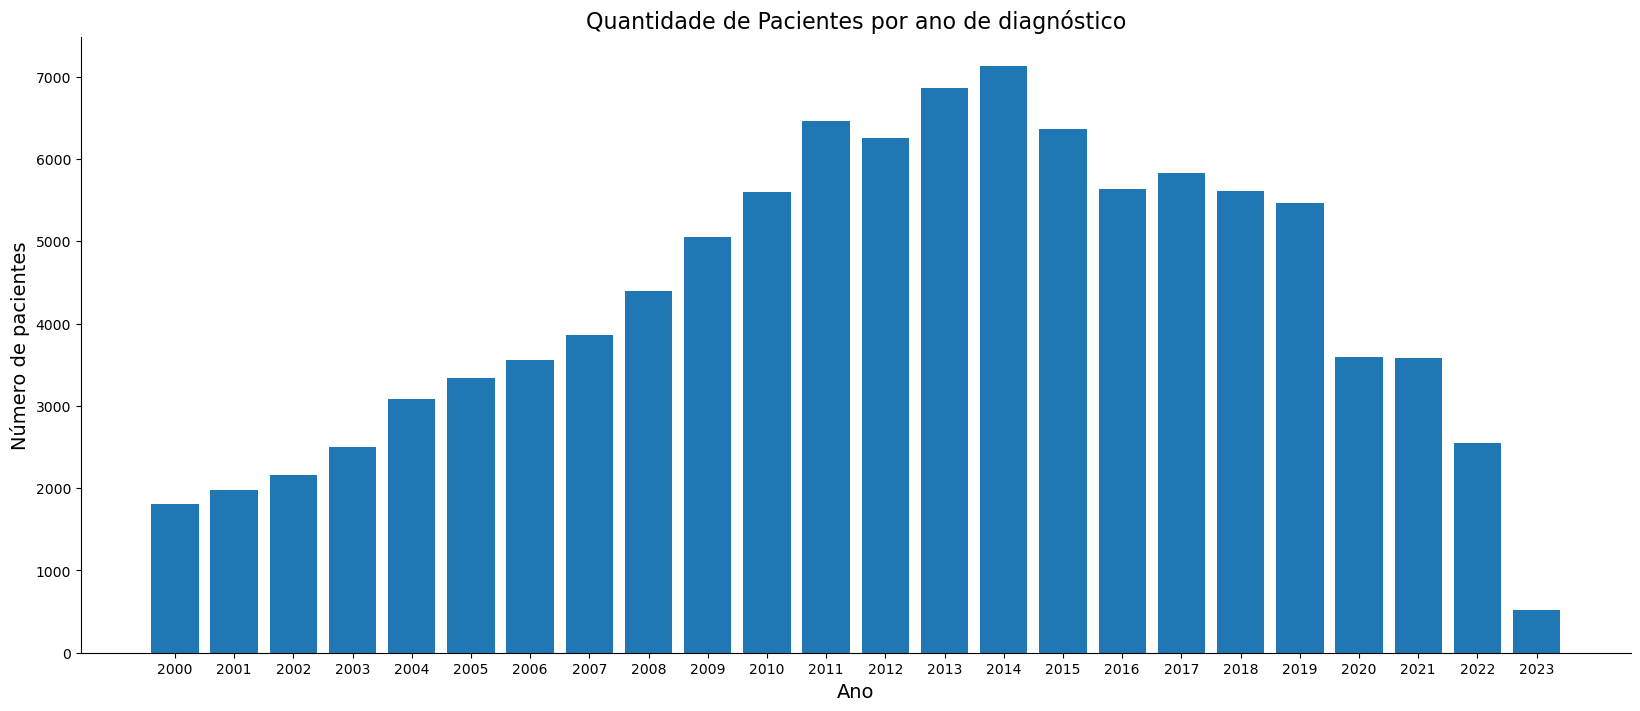

In [364]:
plt.figure(figsize=(20, 8))
plt.bar(height = data.ANODIAG.value_counts().sort_index(), x=np.sort(data.ANODIAG.unique()))
plt.xlabel('Ano', size=14)
plt.xticks(np.sort(data.ANODIAG.unique()))
plt.ylabel('Número de pacientes', size=14)
plt.title('Quantidade de Pacientes por ano de diagnóstico', size=16)
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.show()

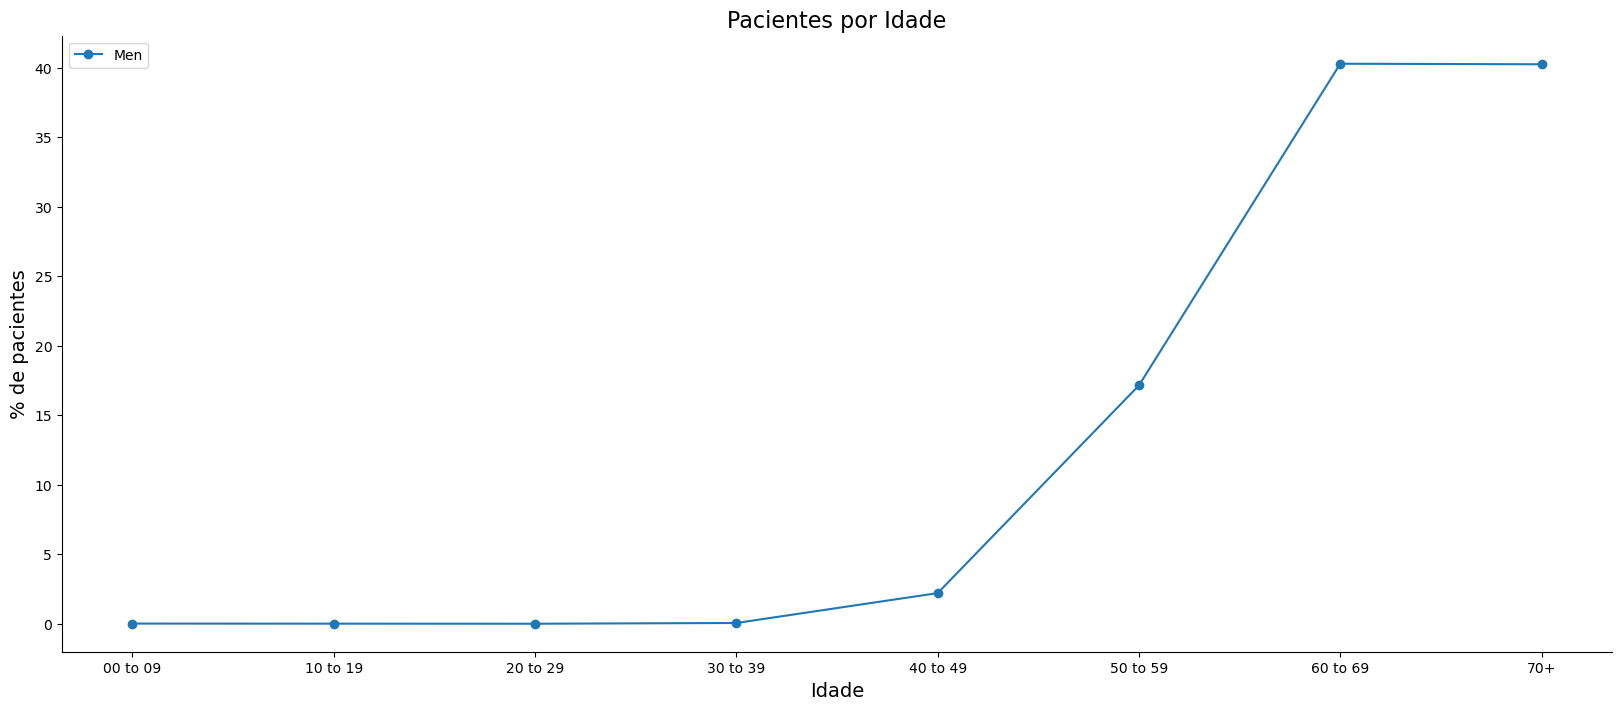

In [365]:
# Substituindo o formato de string para a coluna de faixa etária
before = ['00-09', '10-19', '20-29', '30-39', '40-49', '50-59', '60-69','70+']
after = ['00 to 09', '10 to 19', '20 to 29', '30 to 39', '40 to 49', '50 to 59', '60 to 69','70+']

# Atribuindo a substituição diretamente à coluna
data['FAIXAETAR'] = data['FAIXAETAR'].replace(before, after)

# Preparando os dados para o gráfico
faixas_etarias = np.sort(data['FAIXAETAR'].unique())  # Obtendo faixas etárias únicas ordenadas
contagem_faixas = data['FAIXAETAR'].value_counts().sort_index()  # Contagem por faixa etária, ordenado

# Plotando o gráfico apenas para os homens, uma vez que a coluna já é específica para esse grupo
fig, ax = plt.subplots(figsize=(20, 8))
ax1 = ax.plot(faixas_etarias, (contagem_faixas/data.shape[0])*100, label='Men', marker='o')

# Configurando os rótulos e o título
ax.set_xlabel('Idade', size=14)
ax.set_ylabel('% de pacientes', size=14)
ax.set_title('Pacientes por Idade', size=16)

# Configuração do gráfico
ax.legend()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

plt.show()

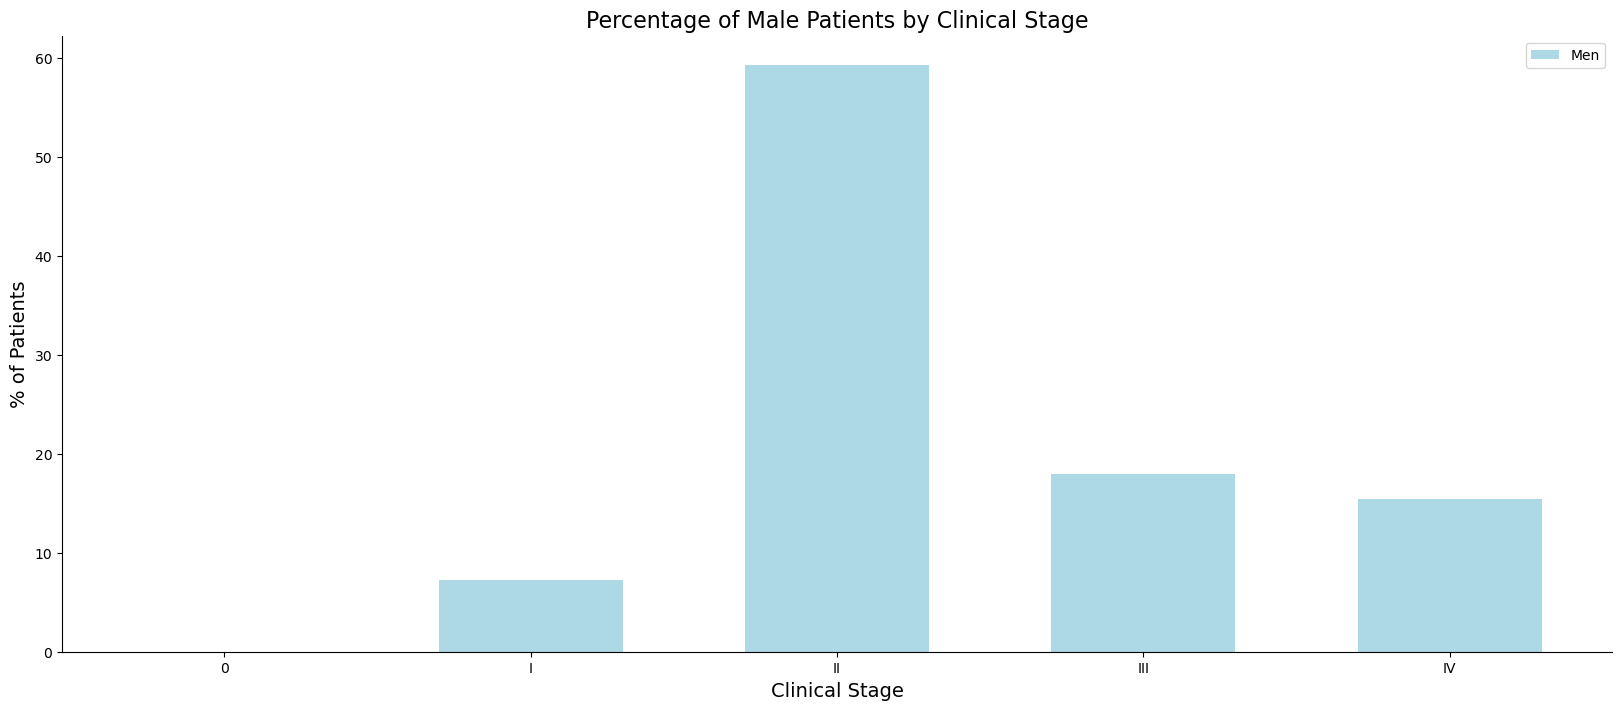

In [366]:
# Definindo as primeiras 5 categorias clínicas (excluindo X e Y)
EC = list(np.sort(data['ECGRUP'].unique()))[:5]  # Considera apenas as categorias 0, I, II, III, IV

# Filtrando o DataFrame `data` para incluir apenas essas categorias clínicas
data_filtered = data.loc[data['ECGRUP'].isin(EC)]

# Preparando os dados para o gráfico
clinical_stages = np.sort(data_filtered['ECGRUP'].unique())  # Categorias clínicas únicas e ordenadas
counts_stages = data_filtered['ECGRUP'].value_counts().sort_index()  # Contagem por categoria clínica

# Definindo as posições para as categorias no eixo x
x = np.arange(len(clinical_stages))

# Criando o gráfico de barras apenas para os homens
fig, ax = plt.subplots(figsize=(20, 8))
width = 0.6  # Largura das barras

# Plotando as barras com a porcentagem de pacientes em cada estágio clínico
ax1 = ax.bar(x, (counts_stages / data_filtered.shape[0]) * 100, width, label='Men', color='lightblue')

# Configurando os rótulos e o título
ax.set_xlabel('Clinical Stage', size=14)
ax.set_ylabel('% of Patients', size=14)
ax.set_title('Percentage of Male Patients by Clinical Stage', size=16)

# Configuração dos rótulos no eixo x
ax.set_xticks(x)
ax.set_xticklabels(list(clinical_stages))

# Removendo linhas de borda desnecessárias no gráfico
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# Exibindo a legenda
ax.legend()

# Exibindo o gráfico
plt.show()


In [367]:
df_diag1 = data[data.DIAGPREV == 1] # without diagnosis/without treatment
df_diag2 = data[data.DIAGPREV == 2] # with diagnosis/without treatment

x = np.sort(df_diag1.ANODIAG.unique())
y = df_diag1.groupby('ANODIAG')['CONSDIAG'].median()

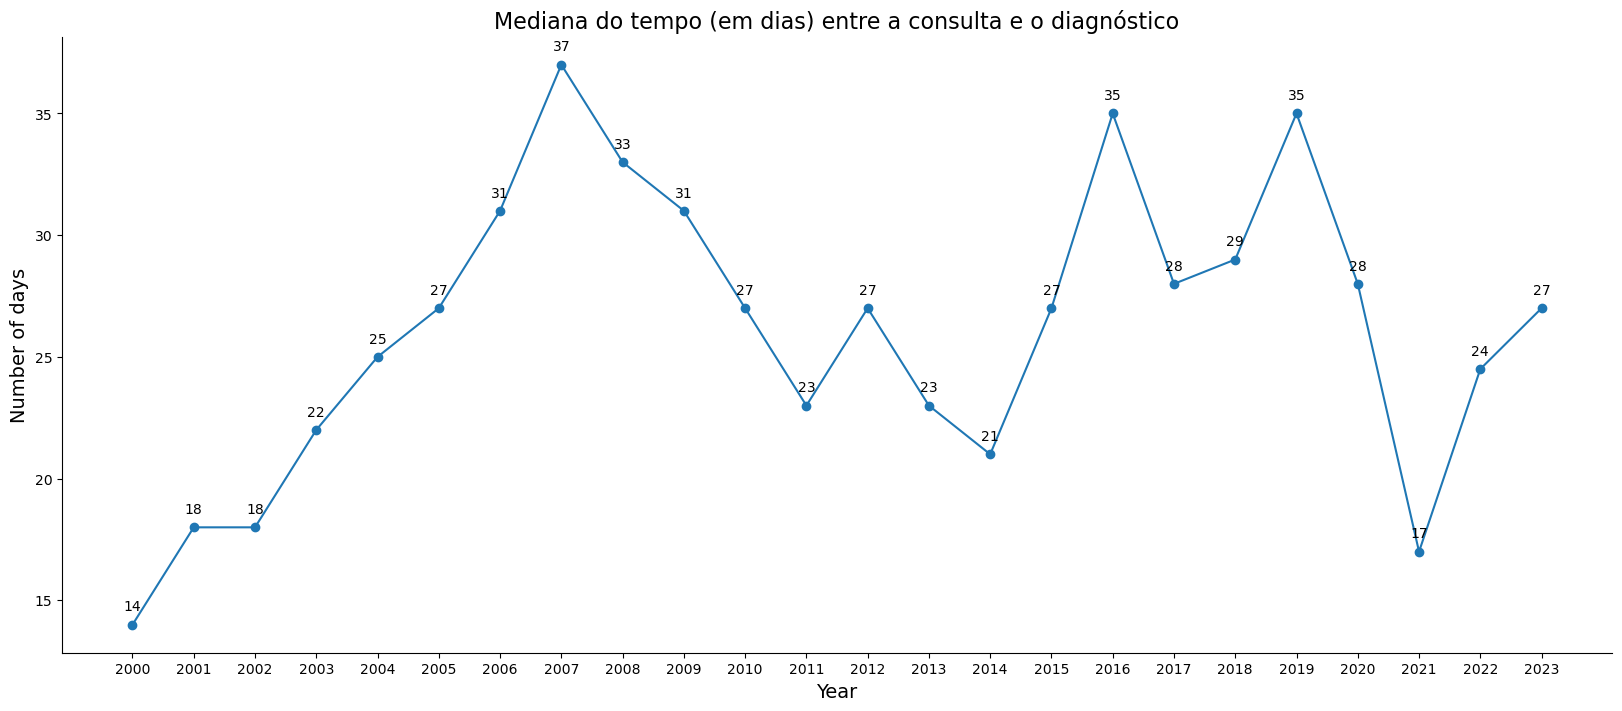

In [368]:
plt.figure(figsize=(20, 8))
plt.plot(x, y, marker='o')
plt.xlabel('Year', size=14)
plt.xticks(x)
plt.ylabel('Number of days', size=14)
plt.title('Mediana do tempo (em dias) entre a consulta e o diagnóstico', size=16)
for xi, yi in zip(x,y):
    label = '{:.0f}'.format(yi)
    plt.annotate(label, # this is the text
                 (xi, yi), # this is the point to label
                 textcoords='offset points', # how to position the text
                 xytext=(0, 10), # distance from text to points (x,y)
                 ha='center') # horizontal alignment can be left, right or center
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

plt.show()

In [369]:
# 1 – Alive with cancer; 2 – Alive, without other specifications;
# 3 – Death by cancer; 4 – Death by other causes, without other specifications
data['ULTINFO'].value_counts()

ULTINFO
2    48052
1    19917
4    19041
3    16188
Name: count, dtype: int64

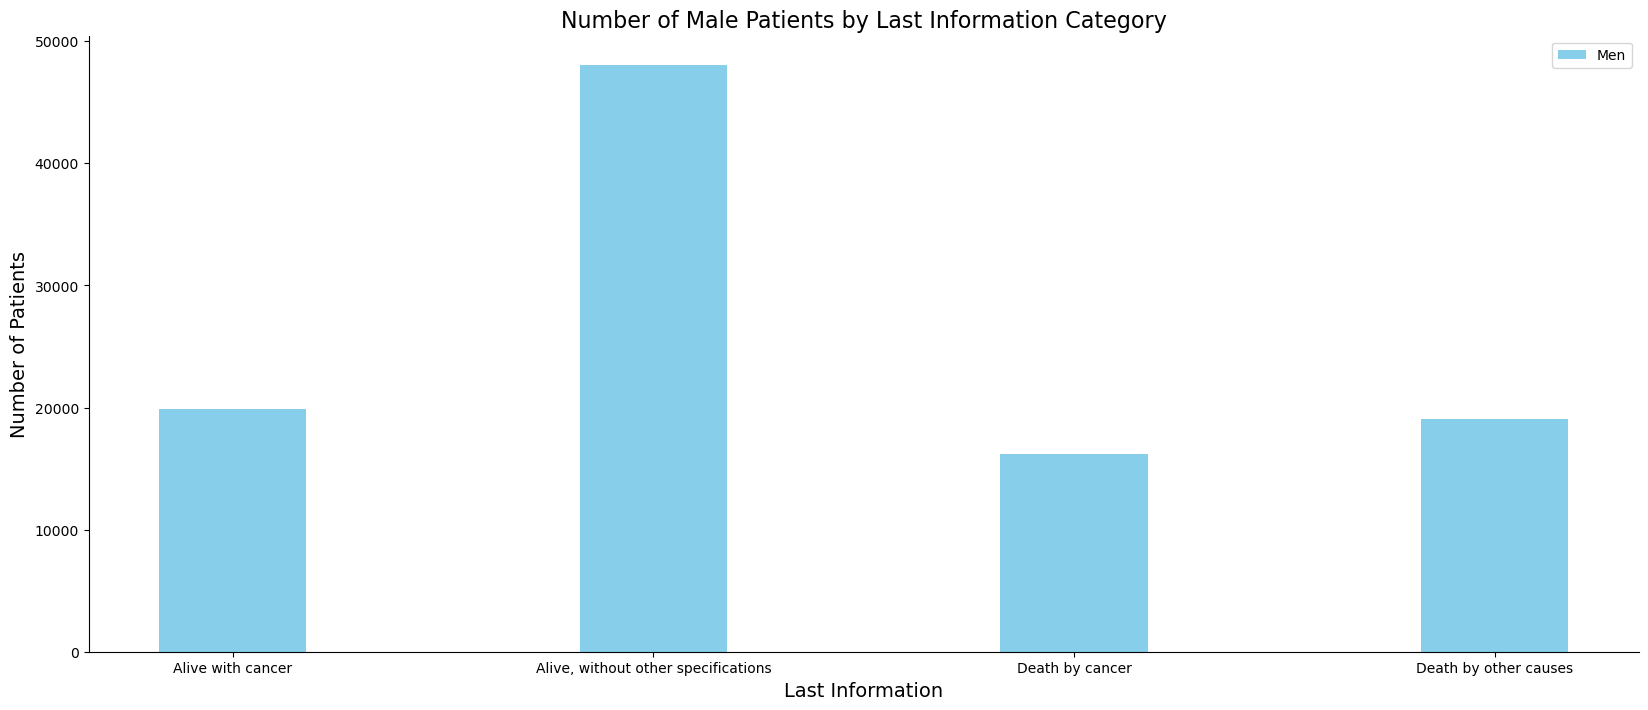

In [370]:
# Obtendo as categorias únicas e suas contagens apenas para homens
mascx = np.sort(data.ULTINFO.unique())
mascy = data.ULTINFO.value_counts().sort_index()

# Definindo as categorias de rótulos no eixo x
x_ticks = ['Alive with cancer', 'Alive, without other specifications', 'Death by cancer', 'Death by other causes']

# Criando o gráfico de barras apenas para homens
x = np.arange(len(x_ticks))  # Posições das categorias no eixo x
fig, ax = plt.subplots(figsize=(20, 8))
width = 0.35  # Largura das barras

# Plotando as barras para homens
ax1 = ax.bar(x, mascy, width, label='Men', color='skyblue')

# Configurando os rótulos e o título do gráfico
ax.set_xlabel('Last Information', size=14)
ax.set_ylabel('Number of Patients', size=14)
ax.set_title('Number of Male Patients by Last Information Category', size=16)

# Configuração do gráfico
ax.legend()
ax.set_xticks(x)
ax.set_xticklabels(list(x_ticks))
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

plt.show()


In [371]:
data.drop(columns=['S',
                     'QUIMIOANT','HORMOANT','TMOANT','IMUNOANT','OUTROANT',
                     'CICI','CICIGRUP','CICISUBGRU',
                   ], inplace=True)

In [372]:
data_numeric = data.select_dtypes(include='number')
corr_matrix =data_numeric.corr()
abs(corr_matrix['ULTINFO']).sort_values(ascending = False)

ULTINFO       1.000000
ANODIAG       0.402533
GLEASON       0.291980
PSA           0.278197
CATEATEND     0.276219
PERDASEG      0.261136
IDADE         0.210338
ESCOLARI      0.143846
DIAGPREV      0.138810
HORMONIO      0.099780
NENHUMAPOS    0.085782
RADIOAPOS     0.085421
DIAGTRAT      0.083088
OUTROAPOS     0.073469
IBGEATEN      0.070665
CONSDIAG      0.063720
G             0.062755
QUIMIO        0.054758
RECREGIO      0.047681
RRAS          0.045688
HORMOAPOS     0.043807
OUTROS        0.039951
CIRURGIA      0.036194
HABILIT2      0.035710
NAOTRAT       0.031961
NENHUM        0.030708
RECDIST       0.029778
RECLOCAL      0.028503
CIRURAPOS     0.027826
QUIMIOAPOS    0.024622
NENHUMANT     0.019749
RADIO         0.019233
IMUNO         0.013881
CLINICA       0.012200
HABILIT       0.010300
CIDO          0.006611
MORFO         0.006611
RECNENHUM     0.006497
IBGE          0.005730
HABILIT1      0.004657
IMUNOAPOS     0.003709
BASEDIAG      0.002965
TRATCONS      0.001272
TMO        

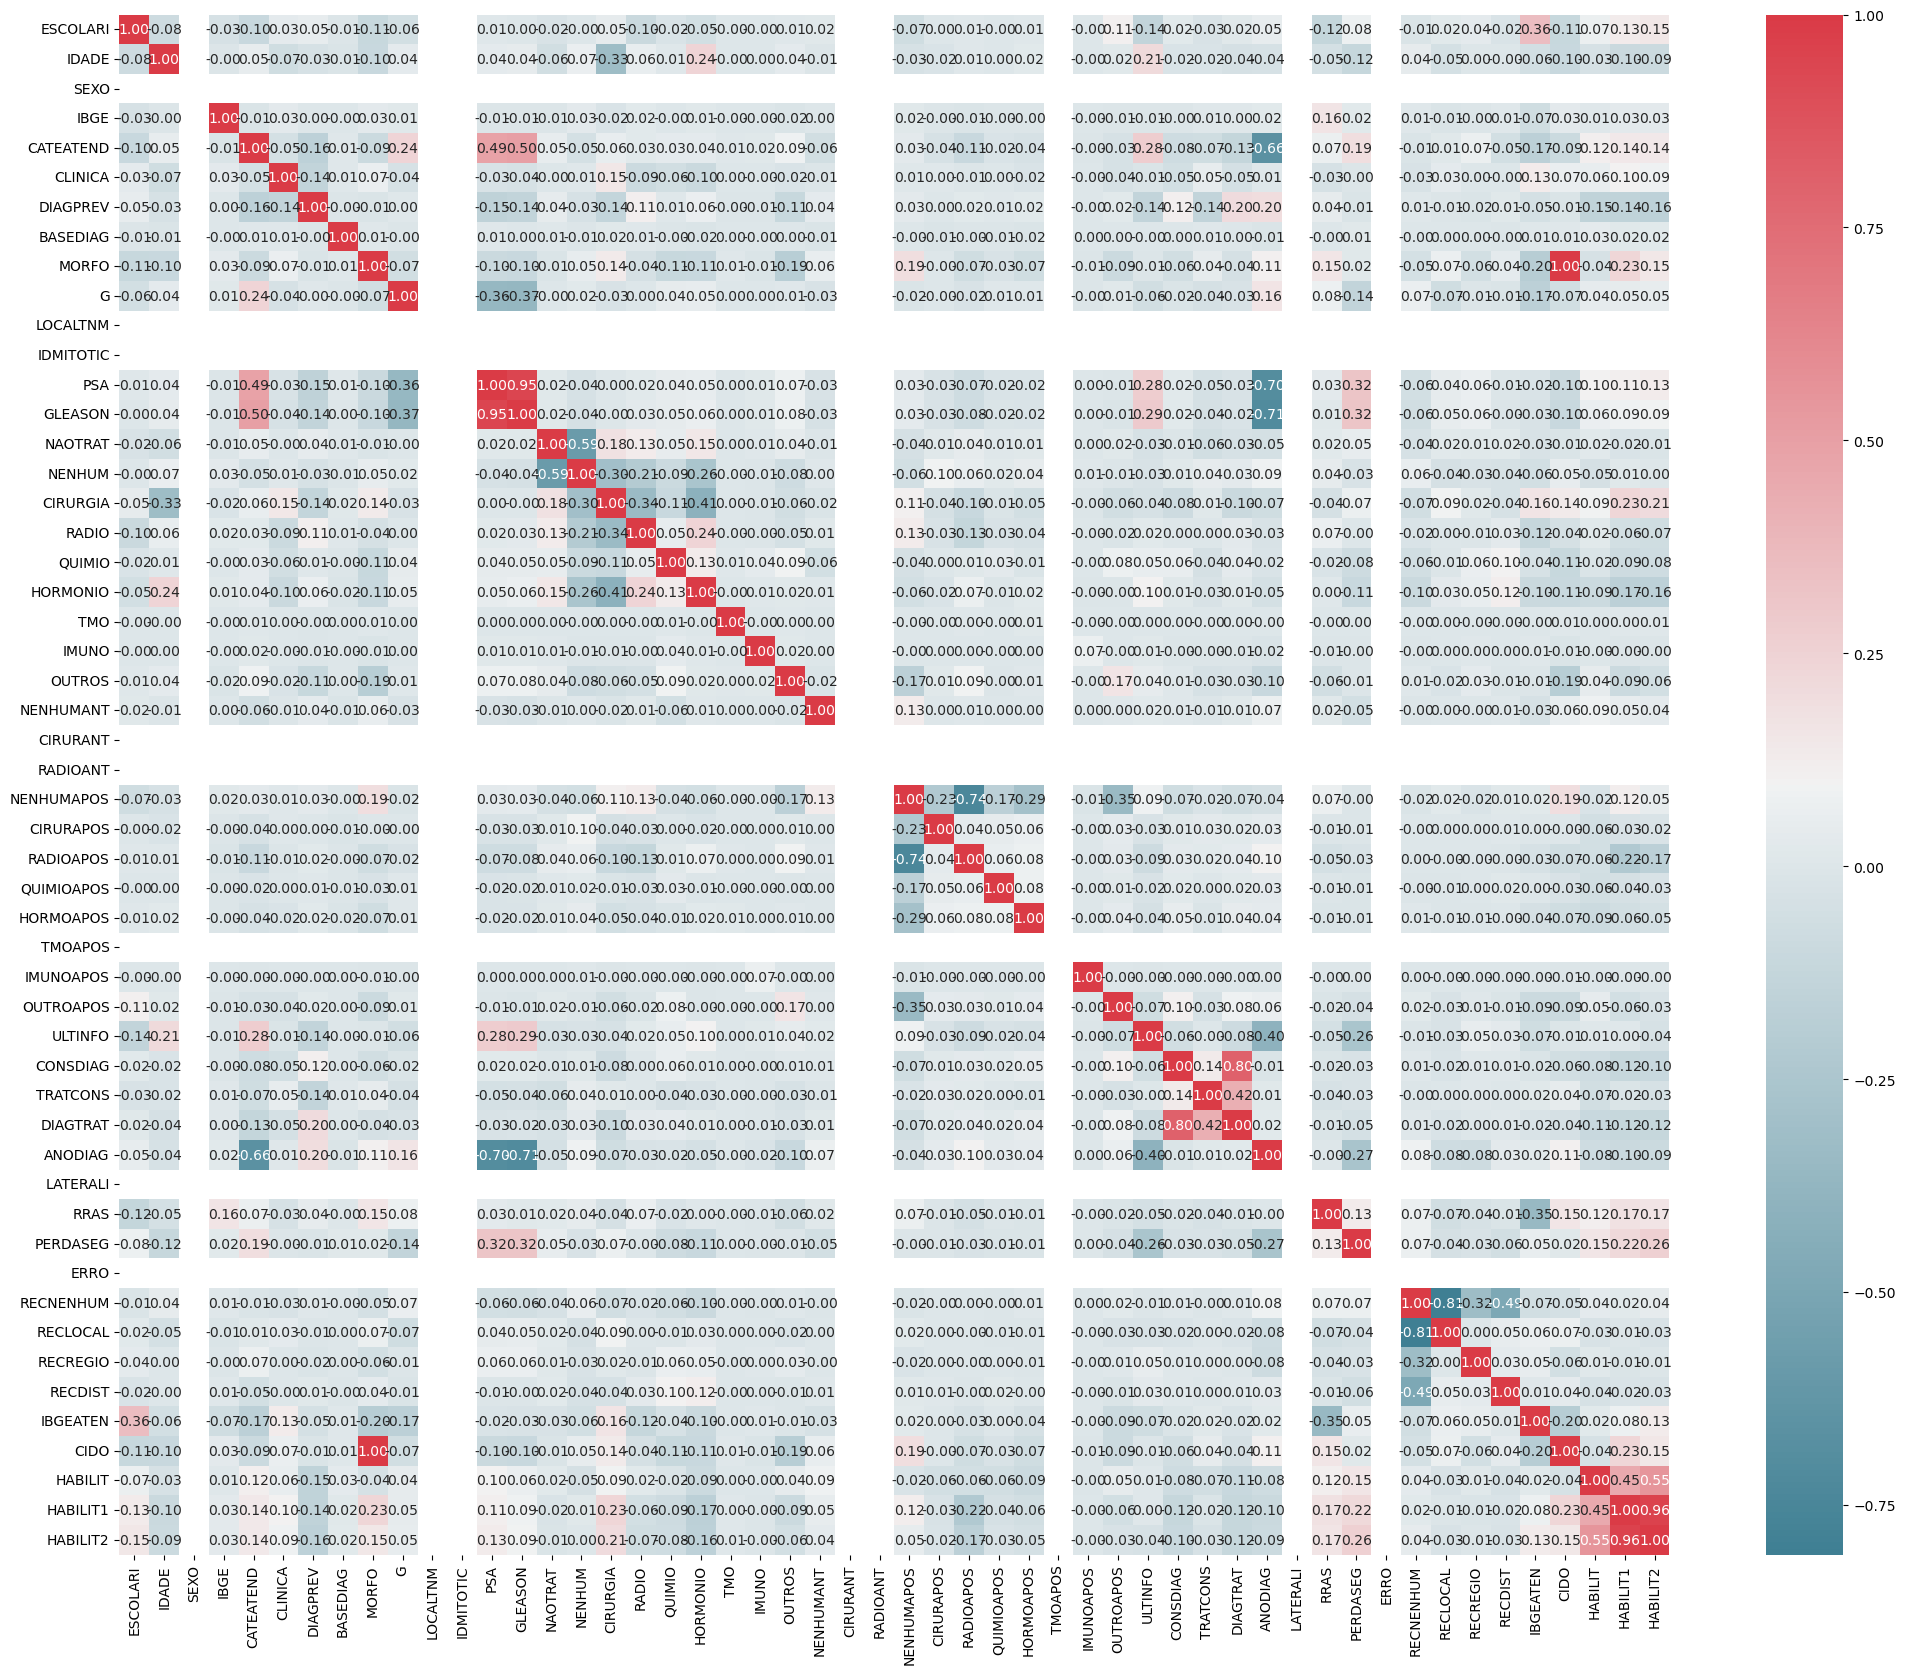

In [373]:
fig, ax = plt.subplots(figsize = (25, 20))
colormap = sns.diverging_palette(220, 10, as_cmap = True)
 
sns.heatmap(corr_matrix, cmap = colormap, annot = True, fmt = '.2f')
plt.show()

In [374]:
data.drop(columns=['SEXO','IDMITOTIC','LOCALTNM','CIRURANT','RADIOANT','LATERALI','ERRO','TMOAPOS'    
                    ], inplace=True)

In [375]:
data_numeric = data.select_dtypes(include='number')

# Calcular a matriz de correlação
corr_matrix = data_numeric.corr()
abs(corr_matrix['ULTINFO']).sort_values(ascending = False)

ULTINFO       1.000000
ANODIAG       0.402533
GLEASON       0.291980
PSA           0.278197
CATEATEND     0.276219
PERDASEG      0.261136
IDADE         0.210338
ESCOLARI      0.143846
DIAGPREV      0.138810
HORMONIO      0.099780
NENHUMAPOS    0.085782
RADIOAPOS     0.085421
DIAGTRAT      0.083088
OUTROAPOS     0.073469
IBGEATEN      0.070665
CONSDIAG      0.063720
G             0.062755
QUIMIO        0.054758
RECREGIO      0.047681
RRAS          0.045688
HORMOAPOS     0.043807
OUTROS        0.039951
CIRURGIA      0.036194
HABILIT2      0.035710
NAOTRAT       0.031961
NENHUM        0.030708
RECDIST       0.029778
RECLOCAL      0.028503
CIRURAPOS     0.027826
QUIMIOAPOS    0.024622
NENHUMANT     0.019749
RADIO         0.019233
IMUNO         0.013881
CLINICA       0.012200
HABILIT       0.010300
CIDO          0.006611
MORFO         0.006611
RECNENHUM     0.006497
IBGE          0.005730
HABILIT1      0.004657
IMUNOAPOS     0.003709
BASEDIAG      0.002965
TRATCONS      0.001272
TMO        

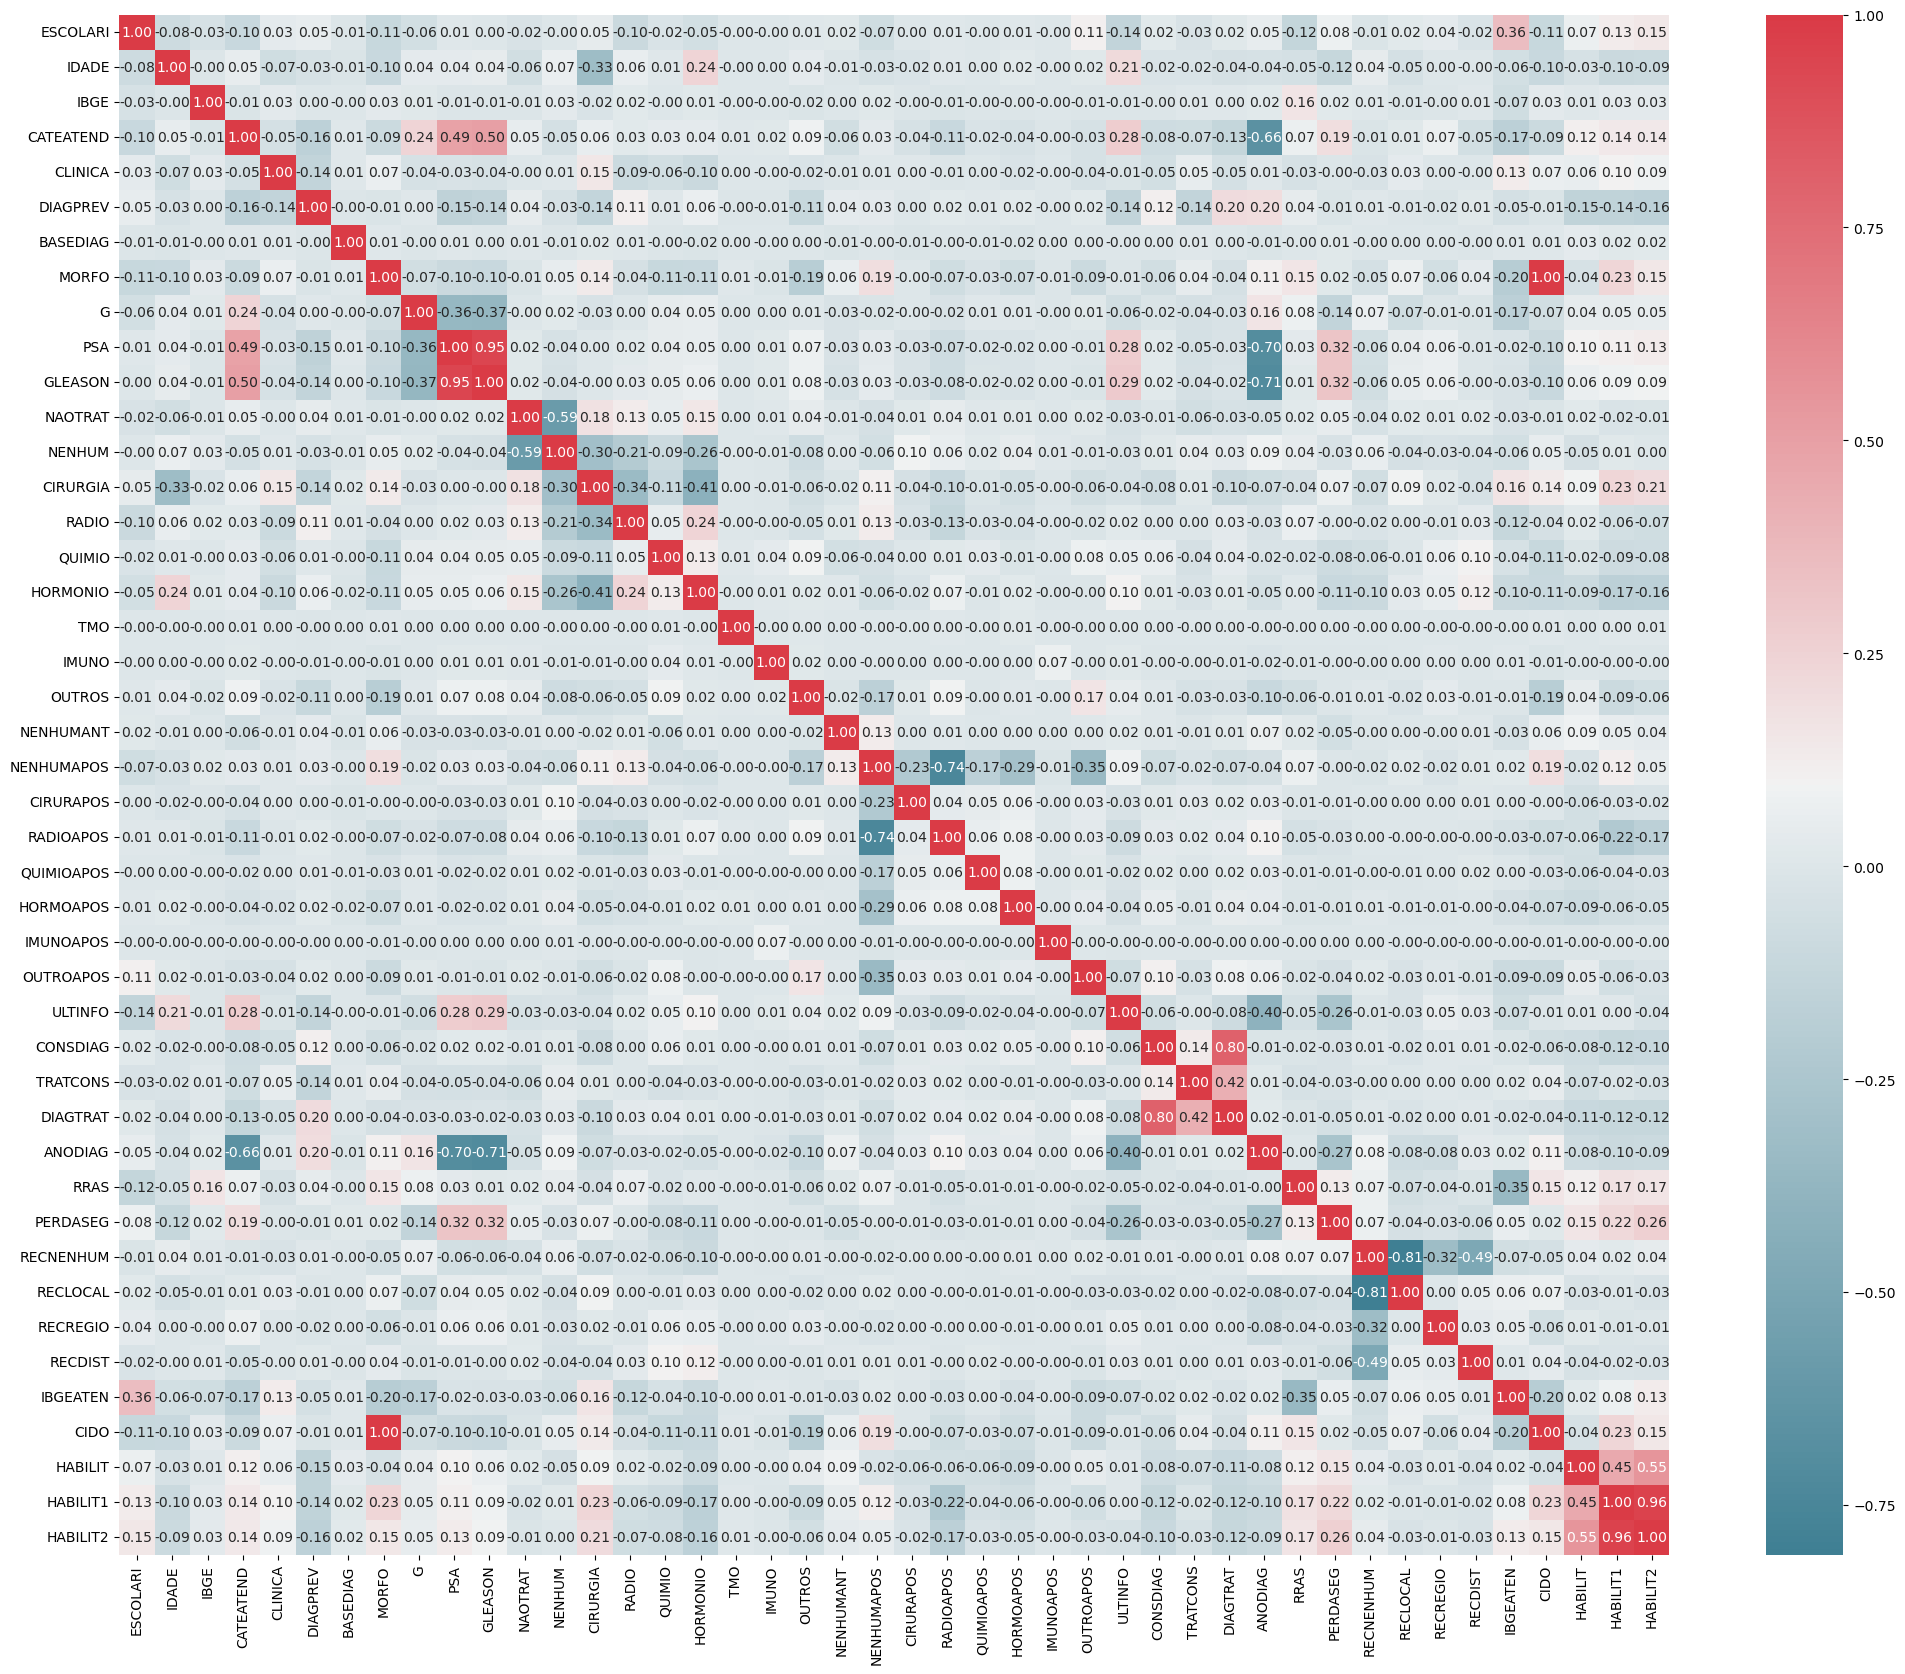

In [376]:
fig, ax = plt.subplots(figsize = (25, 20))
colormap = sns.diverging_palette(220, 10, as_cmap = True)
 
sns.heatmap(corr_matrix, cmap = colormap, annot = True, fmt = '.2f')
plt.show()

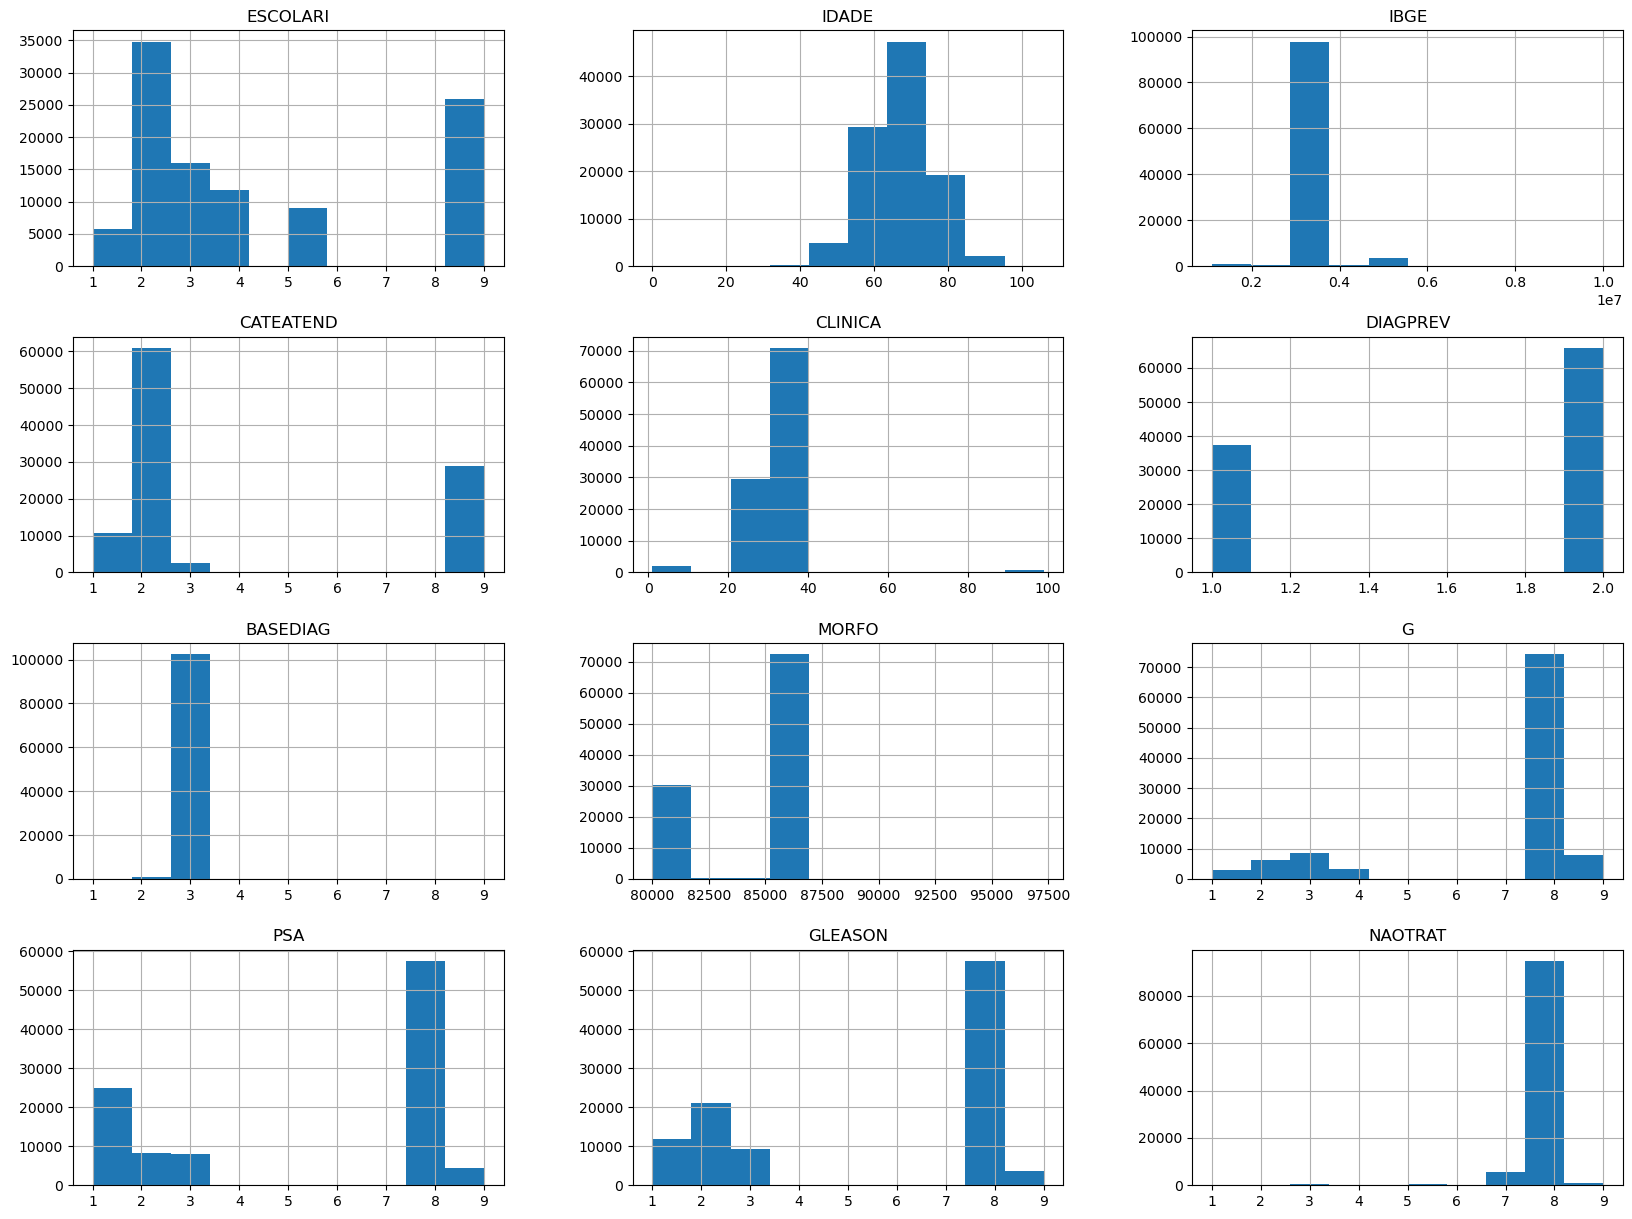

In [377]:
data.iloc[:,:38].hist(bins=10, figsize=(20, 15))
plt.show()

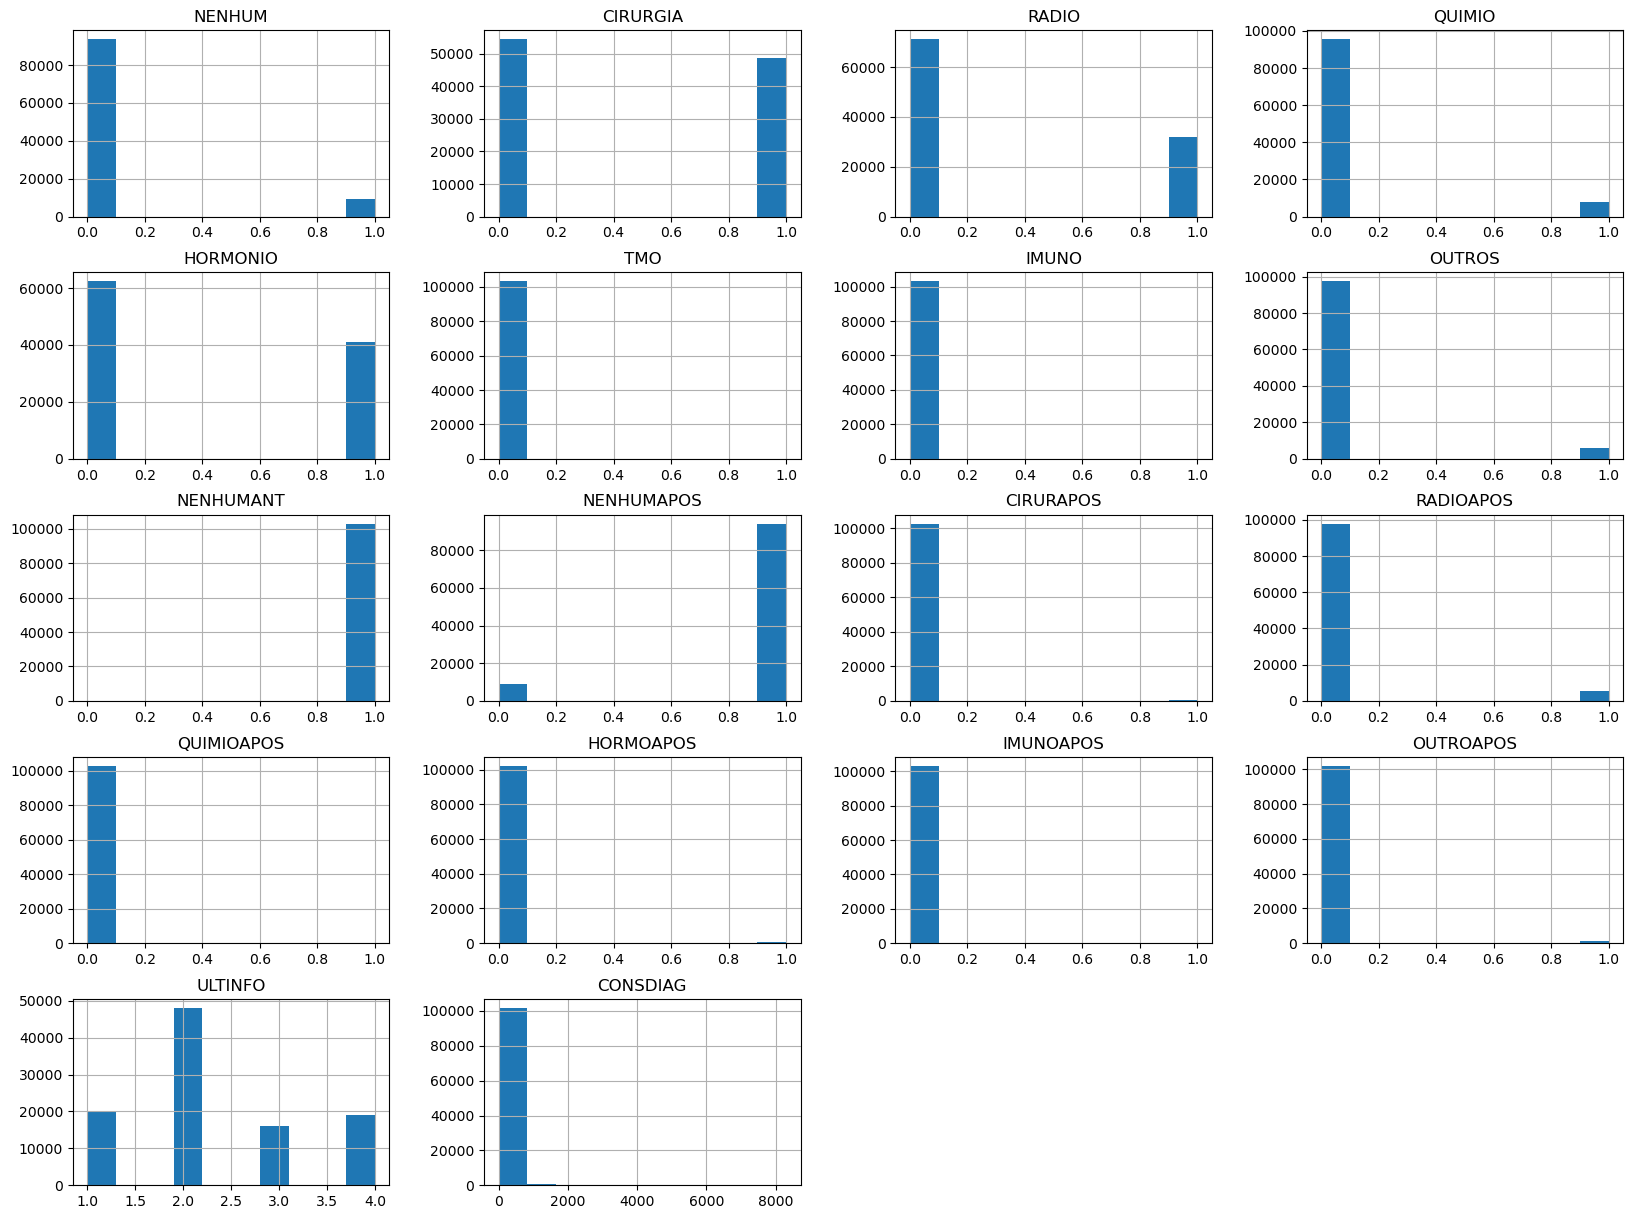

In [378]:
data.iloc[:,38:58].hist(bins=10, figsize=(20, 15))
plt.show()

# Valores Faltantes:

In [380]:
missing = data.isna().sum().sort_values(ascending=False)
prop = missing[missing > 0]/data.shape[0]
prop

REC04         0.999331
INSTORIG      0.999157
META04        0.998711
REC03         0.997326
META03        0.994787
REC02         0.986792
META02        0.974147
REC01         0.949011
OUTRACLA      0.905018
META01        0.894688
DTRECIDIVA    0.880695
PM            0.644925
PN            0.601078
PT            0.591087
DRS           0.088684
DTTRAT        0.080719
DIAGTRAT      0.080719
TRATCONS      0.080719
dtype: float64

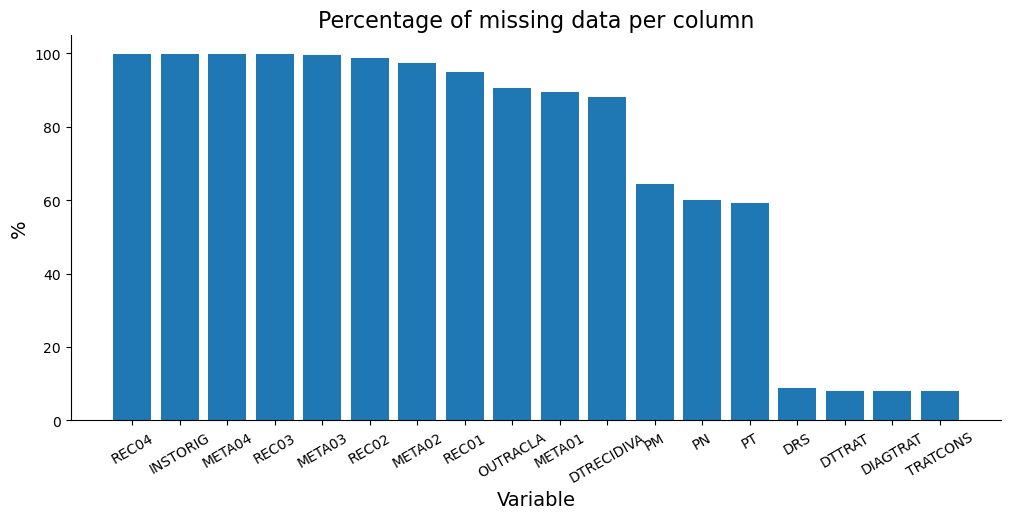

In [381]:
plt.figure(figsize=(12, 5))
plt.bar(height = prop*100, x=prop.index)
plt.xlabel('Variable', size=14)
plt.ylabel('%', size=14)
plt.title('Percentage of missing data per column', size=16)
plt.xticks(rotation=30)
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.show()

In [382]:
# META04 - Metástase. Formato: C99
data[data['META02'].isna() == False]['META02'].shape

(2668,)

# Pré - Processamento

In [385]:

    # Excluindo valores em ECGRUP que possuem X e Y , pois são irrelevantes
    data = data[~data.ECGRUP.isin(['X','Y'])]

    # Selecionamos apenas a morfologia 85503
    data = data[data.MORFO == 85503]
    # Colunas CIDO e DSCCIDO, possuem descrições desta morfologia e todas vão possuir os mesmo valores, logo são irrelevantes.
    data.drop(columns=['CIDO', 'DSCCIDO'],inplace=True)
    # DRS
    DRS_expand = data.DRS.str.split(' ', expand=True)
    data['DRS'] = DRS_expand[1]
    data.DRS.fillna(0)

    data = data[data.UFRESID == 'SP']
    data.drop(columns=['UFRESID', 'UFNASC', 'CIDADE', 'DESCTOPO', 'DESCMORFO',
                 'META01', 'META02', 'REC01', 'REC02', 'REC03',
                 'MORFO',  'TOPO', 'TOPOGRUP', 'T', 
                 'N', 'M', 'NAOTRAT', 'TRATAMENTO', 'TRATFAPOS', 'NENHUMAPOS', 
                 'CIRURAPOS', 'RADIOAPOS', 'QUIMIOAPOS', 'HORMOAPOS', 'IMUNOAPOS',
                 'OUTROAPOS', 'RECLOCAL', 'RECREGIO', 'RECDIST', 'HABILIT', 'META03', 'META04', 'REC03', 'REC04'
                 , 'INSTORIG', 'OUTRACLA' , 'DTRECIDIVA' , 'PM', 'PN', 'PT' ], inplace=True)


In [387]:

data.head(6)

,ESCOLARI,IDADE,IBGE,CATEATEND,DTCONSULT,CLINICA,DIAGPREV,DTDIAG,BASEDIAG,EC,...,FAIXAETAR,DRS,RRAS,PERDASEG,RECNENHUM,IBGEATEN,HABIT11,HABILIT1,HABILIT2,CIDADEH
30828,1,0,3536703,2,12/12/2017,32,2,11/20/2017,3,I,...,00 to 09,06,9,0,1,3506003,"UNACON com Serviþos de Radioterapia, de Hemato...",1,1,Bauru
30829,3,64,3501608,1,5/13/2015,24,2,3/26/2015,3,III,...,60 to 69,07,15,1,1,3538709,UNACON com Serviþos de Radioterapia e de Hemat...,1,1,Piracicaba
30830,3,57,3538709,1,1/26/2015,24,2,12/13/2014,3,I,...,50 to 59,10,14,1,1,3538709,UNACON com Serviþos de Radioterapia e de Hemat...,1,1,Piracicaba
30831,3,52,3538709,2,4/9/2015,24,2,2/12/2015,3,I,...,50 to 59,10,14,1,1,3538709,UNACON com Serviþos de Radioterapia e de Hemat...,1,1,Piracicaba
30832,2,71,3546207,9,10/4/2000,24,2,10/4/2000,3,II,...,70+,10,14,0,1,3538709,UNACON com Serviþos de Radioterapia e de Hemat...,1,1,Piracicaba
30833,3,69,3526704,9,10/11/2001,24,1,1/24/2002,3,IV,...,60 to 69,10,14,0,0,3538709,UNACON com Serviþos de Radioterapia e de Hemat...,1,1,Piracicaba


In [389]:
data.shape

(61681, 42)

In [391]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 61681 entries, 30828 to 103109
Data columns (total 42 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   ESCOLARI    61681 non-null  int64  
 1   IDADE       61681 non-null  int64  
 2   IBGE        61681 non-null  int64  
 3   CATEATEND   61681 non-null  int64  
 4   DTCONSULT   61681 non-null  object 
 5   CLINICA     61681 non-null  int64  
 6   DIAGPREV    61681 non-null  int64  
 7   DTDIAG      61681 non-null  object 
 8   BASEDIAG    61681 non-null  int64  
 9   EC          61681 non-null  object 
 10  ECGRUP      61681 non-null  object 
 11  G           61681 non-null  int64  
 12  PSA         61681 non-null  int64  
 13  GLEASON     61681 non-null  int64  
 14  DTTRAT      56874 non-null  object 
 15  TRATHOSP    61681 non-null  object 
 16  TRATFANTES  61681 non-null  object 
 17  NENHUM      61681 non-null  int64  
 18  CIRURGIA    61681 non-null  int64  
 19  RADIO       61681 non-nul

In [393]:
data.to_csv('data_preProcess1.csv', index=False, encoding='utf-8')